In [10]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from community import community_louvain
# from networkx.algorithms.community.centrality import girvan_newman
%matplotlib inline

### Getting started with Networkx

In [19]:
# Build a graph
G = nx.Graph()
G.add_node(1)
G.add_nodes_from(range(20))
G.add_edges_from(zip(np.random.randint(0, 20, 30), np.random.randint(0, 20, 30)))

#### Basic Graph properties

In [49]:
nodes = G.nodes()
degrees = [G.degree(node) for node in nodes]
try:
    nx.average_shortest_path_length(G)
    nx.diameter(G)
except nx.NetworkXError:
    assert not nx.is_connected(G), "This came unexpected"
    print("The graph is not connected")
    print("There are {} connected components".format(len(list(nx.connected_components(G)))))
nx.density(G)  # nr(edges) / nr(edges_for_complete_graph)
nx.transitivity(G)  # Global clustering coefficient

G.nodes[5]['attribute'] = 'I have an attribute'

# Measurements for the importance of a node
degrees;
katz = nx.katz_centrality(G)
betweenness = nx.betweenness_centrality(G)

The graph is not connected
There are 2 connected components


### Group Detection

**Girvan Newman:** Edges possessing high betweeness centrality separate communities. Let's apply this on our toy sample graph (G) to get a better understanding of the idea.  
The algorithm starts with the entire graph and then it iteratively removes the edge with the highest betweeness.

**The Louvain Method:** It proceeds the other way around: initially every node is considered as a community. The communities are traversed, and for each community it is tested whether by joining it to a neighboring community, we can obtain a better clustering.

In [47]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
comp = girvan_newman(G)  # Returns an iterator over sets of tuples. (1 iteration = whole graph, 1 set = 1 community)
for it, communities in enumerate(itertools.islice(comp, 4)):  # islice just makes sure we only do 4 iterations
    print('Iteration', it+1)
    print(tuple(sorted(c) for c in communities)) 

Iteration 1
([1, 2, 4, 10, 11, 16, 18], [0, 3, 5, 7, 8, 9, 12, 13, 14, 15, 17, 19], [6])
Iteration 2
([1, 2, 4, 10, 11, 16, 18], [0, 3, 5, 8, 12, 13, 14, 19], [6], [7, 9, 15, 17])
Iteration 3
([1, 2, 10, 16], [0, 3, 5, 8, 12, 13, 14, 19], [4, 11, 18], [6], [7, 9, 15, 17])
Iteration 4
([1, 2, 10, 16], [0, 3, 5, 8, 12, 19], [4, 11, 18], [6], [7, 9, 15, 17], [13, 14])


In [55]:
from community import community_louvain
partition = community_louvain.best_partition(G)
# add it as an attribute to the nodes
for n in G.nodes:
    G.nodes[n]["louvain"] = partition[n]
    
# plot it out
pos = nx.spring_layout(G,k=0.2)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=[G.nodes[n]["louvain"] for n in G.nodes], node_size=100, cmap=plt.cm.jet)
plt.axis('off')
# plt.show()
plt.close();

### Visualisation

[All visualisations](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)

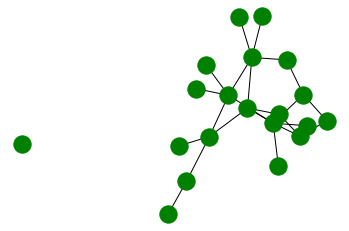

In [31]:
# nx.draw_spring(G)
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')
visualize_graph(G, False)